In [1]:
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing





#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

#load data

df = pd.read_csv('Airline_Delay_Cause.csv')



#rename the data


df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df = df.fillna(df.mean())          #calculate mean value
df.head()


,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [2]:

# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Number of flight arrive on time'] = df['Number of flight arriving at airport'] - df['Number of flight more than 15 minutes late']  - df['Number of flights cancelled']
df['Delayed'] = df['Total time of delayed flight'].apply(lambda x: 0 if x == 0 else 1)



# Display the updated DataFrame
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Number of flight arrive on time,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,31.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,53.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,100.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,57.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,143.0,1


In [3]:
#select SkyWest Airlines Inc from the column


SkyWest_Airlines_Inc = df['carrier_name'] == 'SkyWest Airlines Inc.'

df = df[SkyWest_Airlines_Inc]

df

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Number of flight arrive on time,Delayed
1022,2022,7,OO,SkyWest Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",76.0,28.0,22.00,6.00,0.00,0.0,0.00,4.0,0.0,2884.0,2018.0,866.0,0.0,0.0,0.0,44.0,1
1023,2022,7,OO,SkyWest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",329.0,44.0,41.00,1.00,1.00,0.0,1.00,1.0,2.0,2258.0,1990.0,86.0,58.0,0.0,124.0,284.0,1
1024,2022,7,OO,SkyWest Airlines Inc.,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,0.0,0.0,446.0,425.0,21.0,0.0,0.0,0.0,55.0,1
1025,2022,7,OO,SkyWest Airlines Inc.,ACV,"Arcata/Eureka, CA: California Redwood Coast Hu...",184.0,14.0,10.00,1.00,1.00,0.0,2.00,9.0,3.0,1870.0,978.0,775.0,52.0,0.0,65.0,161.0,1
1026,2022,7,OO,SkyWest Airlines Inc.,ALB,"Albany, NY: Albany International",102.0,14.0,11.00,0.00,1.00,0.0,2.00,0.0,0.0,712.0,585.0,0.0,41.0,0.0,86.0,88.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101115,2017,1,OO,SkyWest Airlines Inc.,TVC,"Traverse City, MI: Cherry Capital",163.0,49.0,19.18,3.29,14.51,0.0,12.02,9.0,1.0,2862.0,1674.0,143.0,485.0,0.0,560.0,105.0,1
101116,2017,1,OO,SkyWest Airlines Inc.,TWF,"Twin Falls, ID: Joslin Field - Magic Valley Re...",89.0,18.0,0.87,2.35,12.47,0.0,2.30,1.0,0.0,1266.0,45.0,662.0,508.0,0.0,51.0,70.0,1
101117,2017,1,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",4.0,2.0,0.00,0.83,0.40,0.0,0.76,0.0,0.0,173.0,0.0,130.0,30.0,0.0,13.0,2.0,1
101118,2017,1,OO,SkyWest Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",141.0,41.0,9.58,0.15,10.43,0.0,20.84,3.0,1.0,3371.0,594.0,7.0,423.0,0.0,2347.0,97.0,1


In [4]:
#select only required column
df = df[['year', 'month', 'Number of flight arriving at airport', 'Number of flight arrive on time', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight', 'Total time of delayed flight due to weather', 'Delayed']]
df.head(1)


,year,month,Number of flight arriving at airport,Number of flight arrive on time,Number of flight more than 15 minutes late,Number of flights delayed due to weather,Total time of delayed flight,Total time of delayed flight due to weather,Delayed
1022,2022,7,76.0,44.0,28.0,6.0,2884.0,866.0,1


In [5]:
weather_delay = df['Number of flights delayed due to weather']
delay = df['Number of flight more than 15 minutes late']

In [6]:
#calculate mean and Standard deviation

mean_weather_delay = weather_delay.mean()
std_weather_delay = weather_delay.std()

print('Mean number of flights delayed due to weather:', mean_weather_delay)
print('Standard deviation of number of flights delayed due to weather:', std_weather_delay)


Mean number of flights delayed due to weather: 2.778481442231652
Standard deviation of number of flights delayed due to weather: 9.015260499891346


In [7]:
number_of_flight = df['Number of flight arriving at airport']
total_delay = df['Number of flight more than 15 minutes late']


In [8]:
#calculate correlation

correlation = weather_delay.corr(total_delay).round(2)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.71


In [9]:
correlation_1 = weather_delay.corr(number_of_flight)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation_1)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.7134393163810268


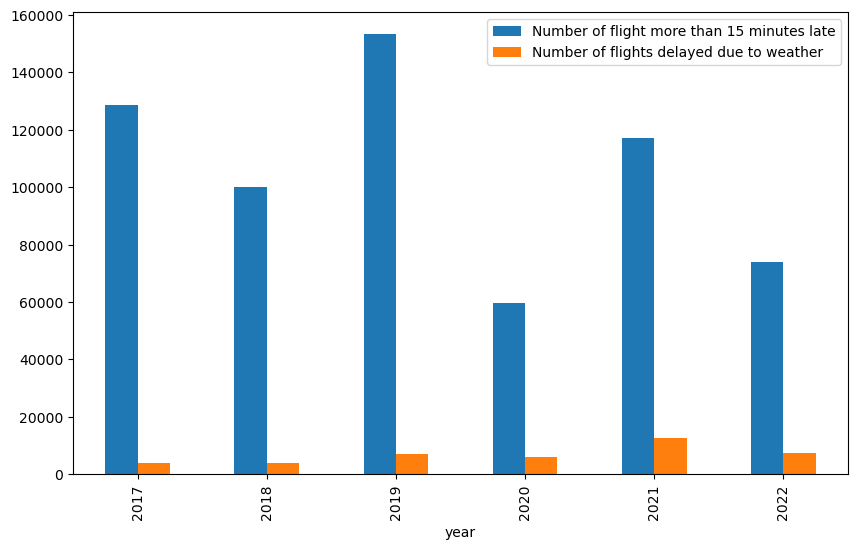

In [10]:
import matplotlib.pyplot as plt


df_sub = df[['year', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather']]
df_grouped = df_sub.groupby('year').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('flights delayed for weather.png')

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

#split column

X1 = df[['year', 'month', 'Number of flight arriving at airport','Number of flight arrive on time', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight due to weather', 'Total time of delayed flight']]
y1 = df['Delayed']

#taking traing and testing data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#using RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


#print the accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print('Accuracy:', accuracy)


#print precision, recall , f1 and support value
classification_1 = (classification_report(y_test1, y_pred1))
print(classification_1)

#print coulmns data's prediction
columns = df.iloc[:, 0:8].columns
feature = pd.Series(model1.feature_importances_, index = columns).sort_values(ascending = False)
feature




Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00      2862

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



Total time of delayed flight due to weather    0.433774
Number of flight more than 15 minutes late     0.355692
Number of flight arriving at airport           0.127352
Number of flight arrive on time                0.068710
Number of flights delayed due to weather       0.009021
Total time of delayed flight                   0.002485
year                                           0.001815
month                                          0.001152
dtype: float64

1.0

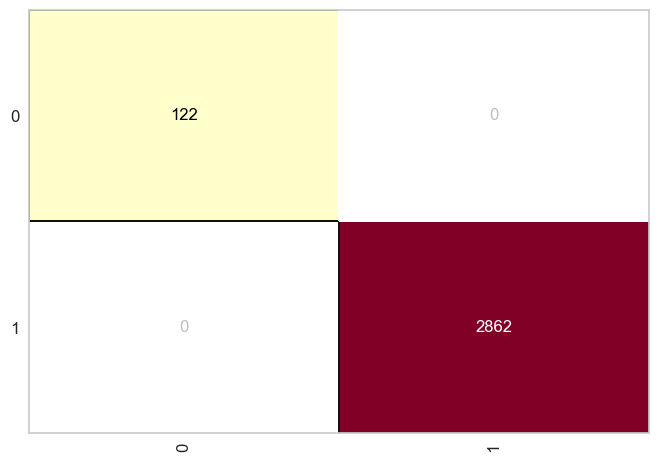

In [12]:
#print confusion matrix
cm = ConfusionMatrix(model1)
cm.fit(X_train1, y_train1)
cm.score(X_test1, y_test1)

In [13]:
#Split the data into input features and target variable. In this case, the input features are the other columns except for the "Number of flights delayed due to weather" column, and the target variable is the "Number of flights delayed due to weather" column.
from sklearn.feature_selection import RFE
X = df.drop(['Number of flights delayed due to weather'], axis=1)
y = df['Number of flights delayed due to weather']


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor model
model = RandomForestRegressor()

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 9.284935912001975


In [14]:
y_pred

array([3.103 , 5.5685, 0.    , ..., 3.0095, 8.1225, 0.7504])

In [15]:
#evalute
new_data = pd.DataFrame({
    "year": [2024],
    "month": [6],
    "Number of flight arriving at airport": [500],
    "Number of flight arrive on time": [200],
    "Number of flight more than 15 minutes late": [100],
    "Total time of delayed flight": [1000],
    "Total time of delayed flight due to weather": [2],
    "Delayed": [0],
})


prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0.0701]


In [16]:
data = df.to_dict(orient = "records") #converting data into dictionary for conncet with mongodb
db = client.skywest_flight_delay_for_weather
db.skywest_flight_delay_for_weather.insert_many(data)